In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import sys
import tensorflow as tf
import keras
import glob
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import csv
import os
print(os.listdir("C:/Users/rajan/Desktop/AIML/R8/External/train/"))

# Any results you write to the current directory are saved as output.

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


Using TensorFlow backend.


In [2]:
plants=os.listdir("C:/Users/rajan/Desktop/AIML/R8/External/train/")
path='C:/Users/rajan/Desktop/AIML/R8/External/train/'
print(plants)
meanl=[]
meanw=[]
minl=[]
minw=[]
maxl=[]
maxw=[]
for k in plants:
    leng=[]
    wid=[]
    print(k)
    l=os.listdir(path+k)
    for j in l:
        im=cv2.imread(path+k+'/'+j)
        leng.append(im.shape[0])
        wid.append(im.shape[1])
    meanl.append(int(sum(leng)/len(leng)))
    meanw.append(int(sum(wid)/len(wid)))
    minl.append(int(min(leng)))
    minw.append(int(min(wid)))
    maxl.append(int(max(leng)))
    maxw.append(int(max(leng)))
print(meanl,meanw,maxl,maxw,minl,minw)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet
[661, 431, 310, 230, 440, 303, 397, 483, 226, 288, 342, 590] [668, 431, 310, 230, 440, 303, 399, 483, 226, 288, 342, 591] [2670, 1582, 866, 718, 1432, 1273, 3457, 1900, 1227, 1317, 1006, 1715] [2670, 1582, 866, 718, 1432, 1273, 3457, 1900, 1227, 1317, 1006, 1715] [73, 121, 66, 54, 51, 55, 71, 54, 49, 63, 62, 49] [73, 121, 66, 54, 51, 55, 71, 54, 49, 63, 62, 49]


In [3]:
def load_train(path,plants,size):
    images=[]
    labels=[]
    ids=[]
    clas=[]
    for fold in plants:
        index=plants.index(fold)
        pat = os.path.join(path, fold)
        files = glob.glob(pat+'/*')
        for f1 in files:
            im=cv2.imread(f1)
            image = cv2.resize(im, (size, size), cv2.INTER_LINEAR)
            images.append(image)
            label = np.zeros(len(plants))
            label[index] = 1.0
            labels.append(label)
            #filename = os.path.basename(f1)
            #ids.append(filename)
            #clas.append(fold)
    images = np.array(images)
    labels = np.array(labels)
        #ids = np.array(ids)
        #cls = np.array(cls)
    images = images.astype(np.float32)
    images = np.multiply(images, 1.0 / 255.0)
    return images,labels

**1. Read the images and generate the train and test dataset (10 points)**

In [4]:
plants=os.listdir("C:/Users/rajan/Desktop/AIML/R8/External/train/")
path='C:/Users/rajan/Desktop/AIML/R8/External/train/'
img_train,y_train=load_train(path,plants,100)


**2. Divide the data set into Train and validation data sets ( 10 points)**

In [5]:
x_train,x_test,y_train,y_test=train_test_split(img_train,y_train,test_size=0.25,random_state=7)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


(3562, 100, 100, 3) (1188, 100, 100, 3)
(3562, 12) (1188, 12)


**3. Initialize & build the model (20 points)**

In [6]:
batch_size = 32
num_classes = 12
epochs = 30
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'plant_detection_trained_model.h5'

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**4. Optimize the model (15 points)**

In [8]:
opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [10]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images


In [11]:
datagen.fit(x_train)

**5.. Predict the accuracy for both train and validation data (5 points)**

In [12]:
model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4,verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
111/111 [==============================] - 74s 668ms/step - loss: 2.3931 - acc: 0.1608 - val_loss: 2.2818 - val_acc: 0.2837
Epoch 2/30
111/111 [==============================] - 74s 668ms/step - loss: 2.0224 - acc: 0.3106 - val_loss: 1.7084 - val_acc: 0.3880
Epoch 3/30
111/111 [==============================] - 76s 683ms/step - loss: 1.7415 - acc: 0.3902 - val_loss: 1.5163 - val_acc: 0.4857
Epoch 4/30
111/111 [==============================] - 75s 672ms/step - loss: 1.5433 - acc: 0.4629 - val_loss: 1.2618 - val_acc: 0.5875
Epoch 5/30
111/111 [==============================] - 75s 676ms/step - loss: 1.3956 - acc: 0.5259 - val_loss: 1.4714 - val_acc: 0.4714
Epoch 6/30
111/111 [==============================] - 75s 679ms/step - loss: 1.3390 - acc: 0.5389 - val_loss: 1.0532 - val_acc: 0.6684
Epoch 7/30
111/111 [==============================] - 76s 686ms/step - loss: 1.2519 - acc: 0.5693 - val_loss: 1.0438 - val_acc: 0.6591
Epoch 8

In [13]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Saved trained model at C:\Users\rajan\Desktop\AIML\R8\External\saved_models\plant_detection_trained_model.h5 
1188/1188 [==============================] - 9s 7ms/step
Test loss: 0.5856382199359261
Test accuracy: 0.8047138047138047


In [14]:
print(model.evaluate(x_train, y_train))  # Evaluate on train set

3562/3562 [==============================] - 26s 7ms/step
[0.4650415516448516, 0.8413812464572686]


In [15]:
print(model.evaluate(x_test, y_test))  # Evaluate on test set

1188/1188 [==============================] - 9s 7ms/step
[0.5856382199359261, 0.8047138047138047]


In [16]:
def load_test(path,size):
  files = sorted(glob.glob(path+'/*'))
  X_test=[]
  X_test_id=[]
  for f in files:
      filename = os.path.basename(f)
      img = cv2.imread(f)
      img = cv2.resize(img, (size, size), cv2.INTER_LINEAR)
      X_test.append(img)
      X_test_id.append(filename)

  X_test = np.array(X_test, dtype=np.uint8)
  X_test = X_test.astype('float32')
  X_test = X_test / 255

  return X_test, X_test_id

In [17]:
path='C:/Users/rajan/Desktop/AIML/R8/External/test/'
x_test,test_id=load_test(path,100)

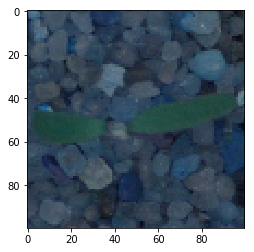

In [18]:
# print int(model.predict_classes(x_test[793:],batch_size=2,verbose=1))
# print test_id[1]
plt.imshow(x_test[1])
plt.show()

In [19]:
result=list(model.predict_classes(x_test))
res=[plants[x] for x in result]

In [20]:
sample_sub = pd.read_csv('C:/Users/rajan/Desktop/AIML/R8/External/sample_submission.csv')
sample_sub.head()

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet
